
# Predictive Model for Customer Buying Behavior

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Dataset Overview

In [146]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
print('Our Dataser contain',df.shape[0],'Rows and' ,df.shape[1], 'columns.')
df.head()

Our Dataser contain 50000 Rows and 14 columns.


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [3]:
df1 = df.copy()

In [4]:
df.index

RangeIndex(start=0, stop=50000, step=1)

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
print(f'In our dataset there are',df.duplicated().sum(),'Duplicate Rows.')

In our dataset there are 719 Duplicate Rows.


In [13]:
# drop duplicates
df = df.drop_duplicates()

In [33]:
#df.reset_index(inplace = True) #Let's Reset the index 

### Exploratory Data Analysis

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [19]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [21]:
df.describe(include = 'object')

,sales_channel,trip_type,flight_day,route,booking_origin
count,49281,49281,49281,49281,49281
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,43917,48779,7988,2620,17691


In [23]:
print(f'Our Dataset have',df.shape[0],'Rows and' ,df.shape[1],'columns')

Our Dataset have 49281 Rows and 14 columns


In [25]:
df['booking_complete'].value_counts()

booking_complete
0    41890
1     7391
Name: count, dtype: int64

In [27]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

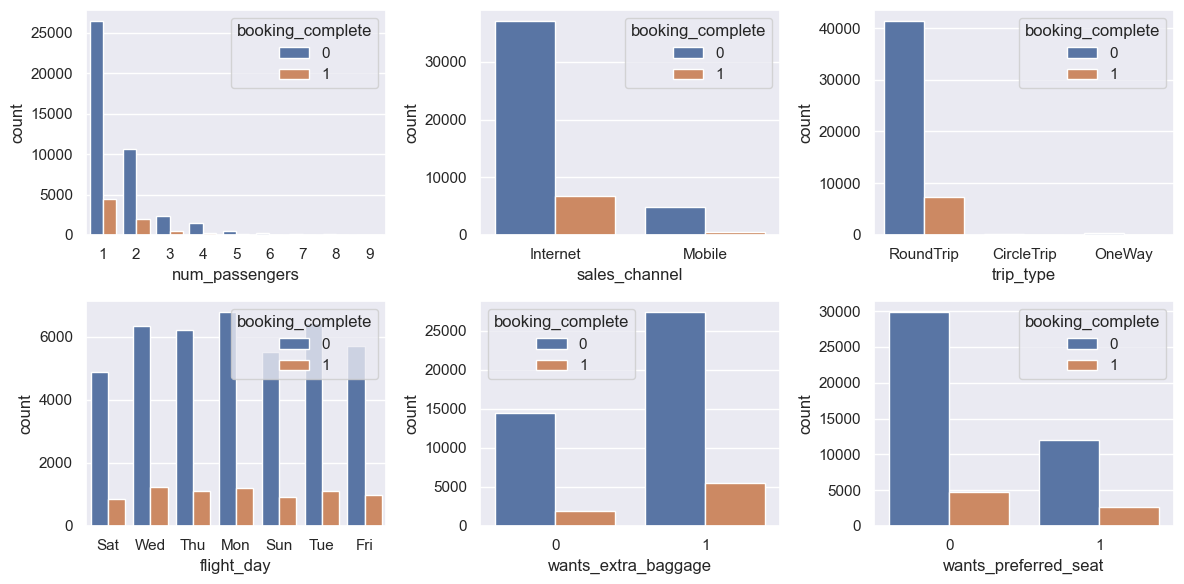

In [30]:
fig,ax = plt.subplots(2,3,figsize = (12,6))
sns.countplot(data = df , x = 'num_passengers',hue = 'booking_complete',ax = ax[0][0])
sns.countplot(data = df , x = 'sales_channel',hue = 'booking_complete',ax = ax[0][1])
sns.countplot(data = df , x = 'trip_type',hue = 'booking_complete',ax = ax[0][2])

sns.countplot(data = df , x = 'flight_day',hue = 'booking_complete',ax = ax[1][0])
sns.countplot(data = df , x = 'wants_extra_baggage',hue = 'booking_complete',ax = ax[1][1])
sns.countplot(data = df , x = 'wants_preferred_seat',hue = 'booking_complete',ax = ax[1][2])

plt.tight_layout()
plt.show

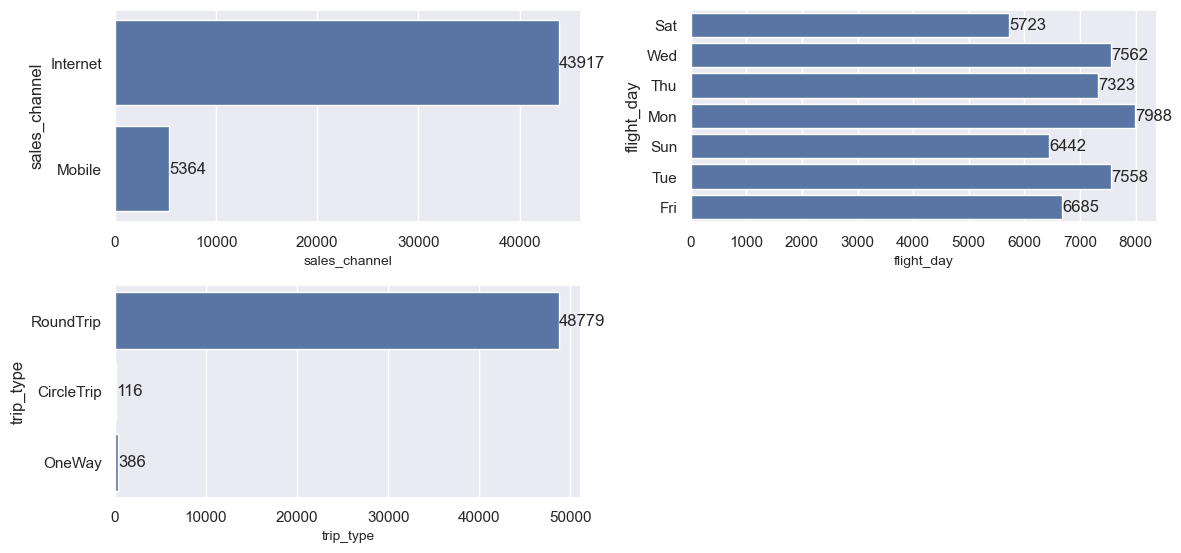

In [31]:
col_list = ['sales_channel','flight_day','trip_type']
plt.figure(figsize = (12,8),facecolor = 'white')
plotnumber = 1 

for column in col_list:
    ax = plt.subplot(3,2,plotnumber)
    sns.countplot(df[column])
    ax.bar_label(ax.containers[0])
    plt.xlabel(column, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

df['booking_origin'].value_counts().sort_values(ascending = False).head(20).to_frame()

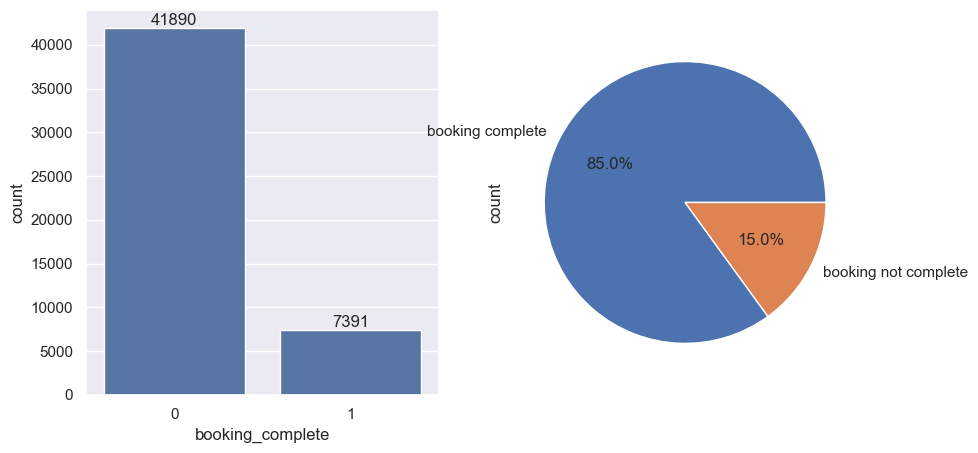

In [33]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
sns.countplot(data = df, x= 'booking_complete',ax = ax[0])
ax[0].bar_label(ax[0].containers[0])

df['booking_complete'].value_counts().plot(kind = 'pie',ax = ax[1],autopct = '%1.1f%%',labels = ['booking complete','booking not complete'])
plt.show()

In [34]:
#sns.pairplot(df,hue = 'booking_complete')

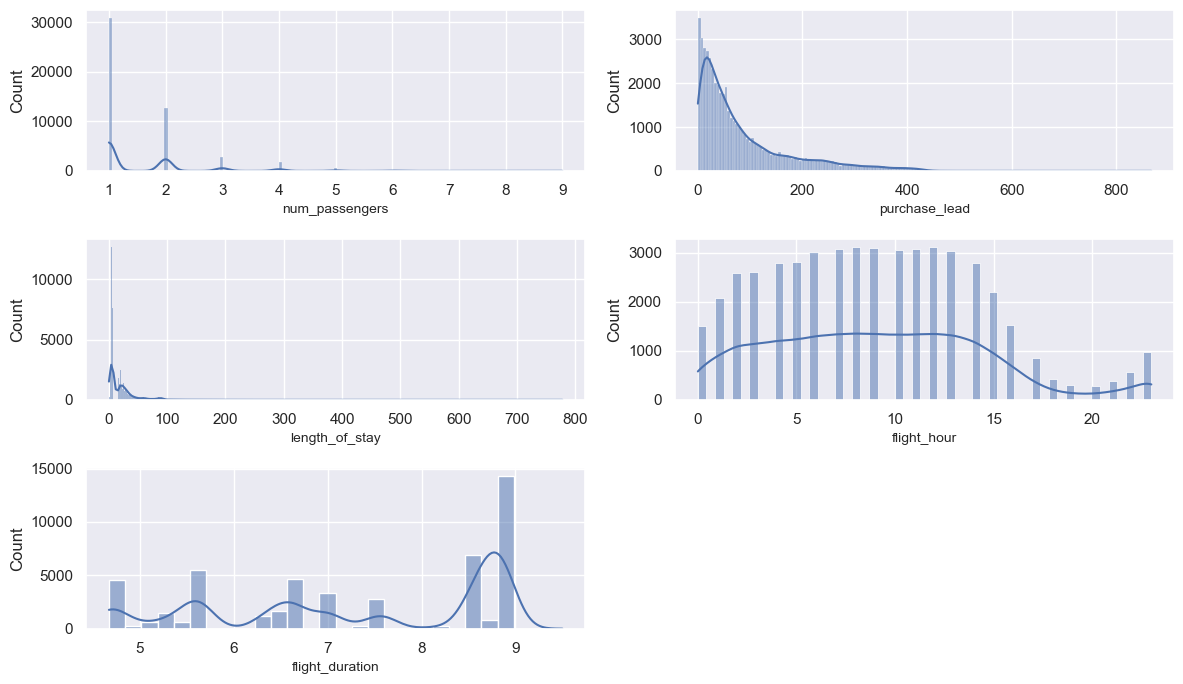

In [35]:
col_list = ['num_passengers', 'purchase_lead','length_of_stay', 'flight_hour','flight_duration']

plt.figure(figsize = (12,7),facecolor = 'white')
plotnumber = 1 

for column in col_list:
    ax = plt.subplot(3,2,plotnumber)
    sns.histplot(df[column],kde = True)
    plt.xlabel(column, fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [36]:
#sns.pairplot(df[col_list],hue = 'booking_complete')

In [38]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<Axes: >

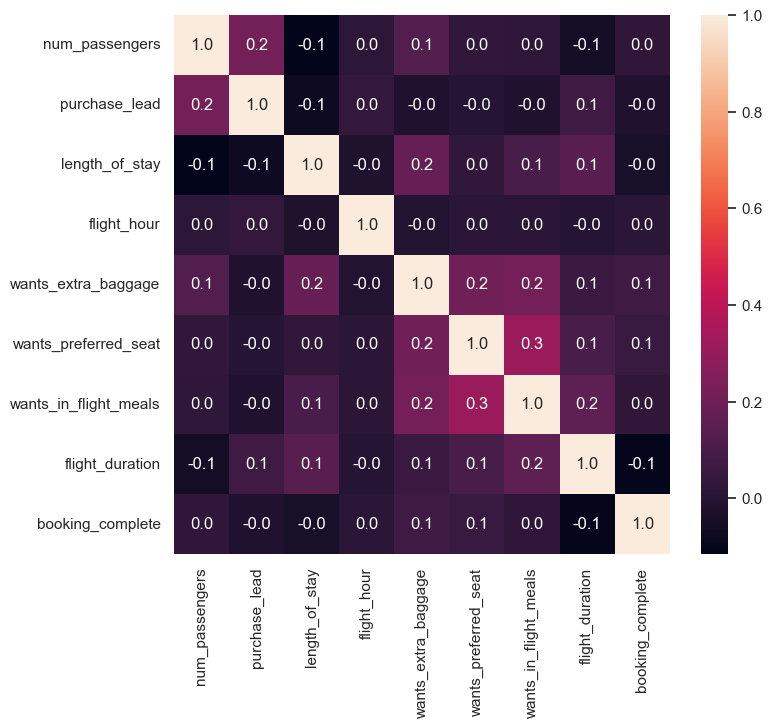

In [39]:
plt.figure(figsize= (8,7))
sns.heatmap(df.select_dtypes(include = 'number').corr(),annot = True,fmt = ".1f")

### Feature Engineering

In [42]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [45]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [46]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [81]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [47]:
df['booking_origin'].nunique()

12

Now our 'booking_origin' has 104 Unique values if we apply one hot encoding or get_dummies it will give 103 new features which are not even that important for our dataset so we will create dummy columns for the values which are repeating more then 1000 times or their frequency is more then 100.

In [31]:
df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998, 49999],
      dtype='int64', length=49281)

In [45]:
counts = df['booking_origin'].value_counts()
thresold = 1000
repl_col = counts[counts<=thresold].index
df['booking_origin'] = df['booking_origin'].replace(repl_col,'uncommon')

In [373]:
df.route.nunique()

799

In [59]:
counts = df['route'].value_counts()
thresold = 250
repl_route = counts[counts<=thresold].index
df['route'] = df['route'].replace(repl_route,'other')

### Features and Labels

In [63]:
df.head()

,index,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0,2,Internet,RoundTrip,262,19,7,Sat,other,New Zealand,1,0,0,5.52,0
1,1,1,Internet,RoundTrip,112,20,3,Sat,other,New Zealand,0,0,0,5.52,0
2,2,2,Internet,RoundTrip,243,22,17,Wed,other,India,1,1,0,5.52,0
3,3,1,Internet,RoundTrip,96,31,4,Sat,other,New Zealand,0,0,1,5.52,0
4,4,2,Internet,RoundTrip,68,22,15,Wed,other,India,1,0,1,5.52,0


In [65]:
X = df.copy()
y = X.pop('booking_complete')

In [67]:
X.shape

(49281, 14)

In [69]:
y.shape

(49281,)

### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3, random_state = 0)

In [74]:
print(f'size of X_tain is :',X_train.shape )
print(f'size of X_test is :',X_test.shape )
print(f'size of y_tain is :',y_train.shape)
print(f'size of y_test is :',y_test.shape )

size of X_tain is : (34496, 14)
size of X_test is : (14785, 14)
size of y_tain is : (34496,)
size of y_test is : (14785,)


### OneHotEncoding

In [117]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [119]:
CAT_FEATURES = X_train.select_dtypes(include='object').columns.to_list()

In [121]:
one_hot_encoder = OneHotEncoder(sparse_output =False, handle_unknown='ignore', drop='first')

In [123]:
one_hot_transformer = ColumnTransformer(
    [("one_hot", one_hot_encoder, CAT_FEATURES)]
    #,remainder='passthrough'
)

In [125]:
one_hot_transformer.fit(X_train)

ColumnTransformer(transformers=[('one_hot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sales_channel', 'trip_type', 'flight_day',
                                  'route', 'booking_origin'])])

In [127]:
#col_names = one_hot_transformer.get_feature_names()

X_train_cat = pd.DataFrame(one_hot_transformer.transform(X_train),columns=one_hot_transformer.get_feature_names_out(), index=X_train.index)

X_train_ohe = pd.concat([X_train, X_train_cat], axis=1).drop(CAT_FEATURES, axis=1)

X_test_cat = pd.DataFrame(one_hot_transformer.transform(X_test), columns=one_hot_transformer.get_feature_names_out(), index=X_test.index)

X_test_ohe = pd.concat([X_test, X_test_cat], axis=1).drop(CAT_FEATURES, axis=1)


#### Evaluation Function

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

def model_evaluation(model,x_train,y_train):
    train_pred = model.predict(x_train)
    accuracy = accuracy_score(y_train,train_pred)
    precision = precision_score(y_train,train_pred, average='weighted')
    recall = recall_score(y_train,train_pred,average = 'weighted')
    print('_________training scores____________ \n')
    print(f'Accuracy  : ',round(accuracy,2))
    print(f'Precision : ',round(precision,2))
    print(f'Recall    : ',round(recall,2))
    print('\n Confusion Matrix')
    print(confusion_matrix(y_train,train_pred))

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import precision_score,recall_score,roc_auc_score,roc_curve, accuracy_score, confusion_matrix,precision_recall_curve,auc
#cm = confusion_matrix(y_test,y_pred,labels = [0,1])

def model_evaluation_report(model,X_test,y_true):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    fpr,tpr,thresold = roc_curve(y_true,y_pred_prob)
    roc_auc = roc_auc_score(y_true,y_pred_prob)
    cm = confusion_matrix(y_true,y_pred,labels = [0,1])
    tn, fp, fn, tp = cm.ravel()

    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred, average='weighted')
    recall = recall_score(y_true,y_pred,average = 'weighted')
    print('_________scores____________ \n')
    print(f'Accuracy  : ',round(accuracy,2))
    print(f'Precision : ',round(precision,2))
    print(f'Recall    : ',round(recall,2))
    
    
    fig,ax = plt.subplots(1,3,figsize = (18,6))
    fig.suptitle('Performance Evaluation', fontsize=16)
    labels = [0,1]
    
    sns.heatmap(cm, annot=True, fmt='d', linewidths=0.5, square=True, cbar=False, ax=ax[0])
    ax[0].set(xlabel='Predicted label', ylabel='Actual label', title='Confusion Matrix')
    ax[0].set_xticklabels(labels)
    ax[0].set_yticklabels(labels)

    
    ax[1].plot(fpr,tpr)
    ax[1].plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
    ax[1].plot(fp/(fp+tn),tp/(tp+fn),'ro',markersize = 8,label = 'Decision Point')
    ax[1].plot([0,1],[0,1],'r--')
    ax[1].set_xlabel("False Positive Rate")
    ax[1].set_ylabel("True Positive Rate")
    ax[1].set_title("ROC Curve")
    ax[1].legend(loc="best")

    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    pr_auc = auc(recall, precision)

    ax[2].plot(precision,recall,'r--',label = f'PR-AUC = {pr_auc:.2f}')
    ax[2].set(xlabel='Recall', ylabel='Precision',title='Precision-Recall Curve')
    ax[2].legend(loc='best')
    
    plt.show()   

### Model Building

#### Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight = 'balanced')

rfc.fit(X_train_ohe,y_train)

RandomForestClassifier(class_weight='balanced')

_________scores____________ 

Accuracy  :  0.85
Precision :  0.8
Recall    :  0.85


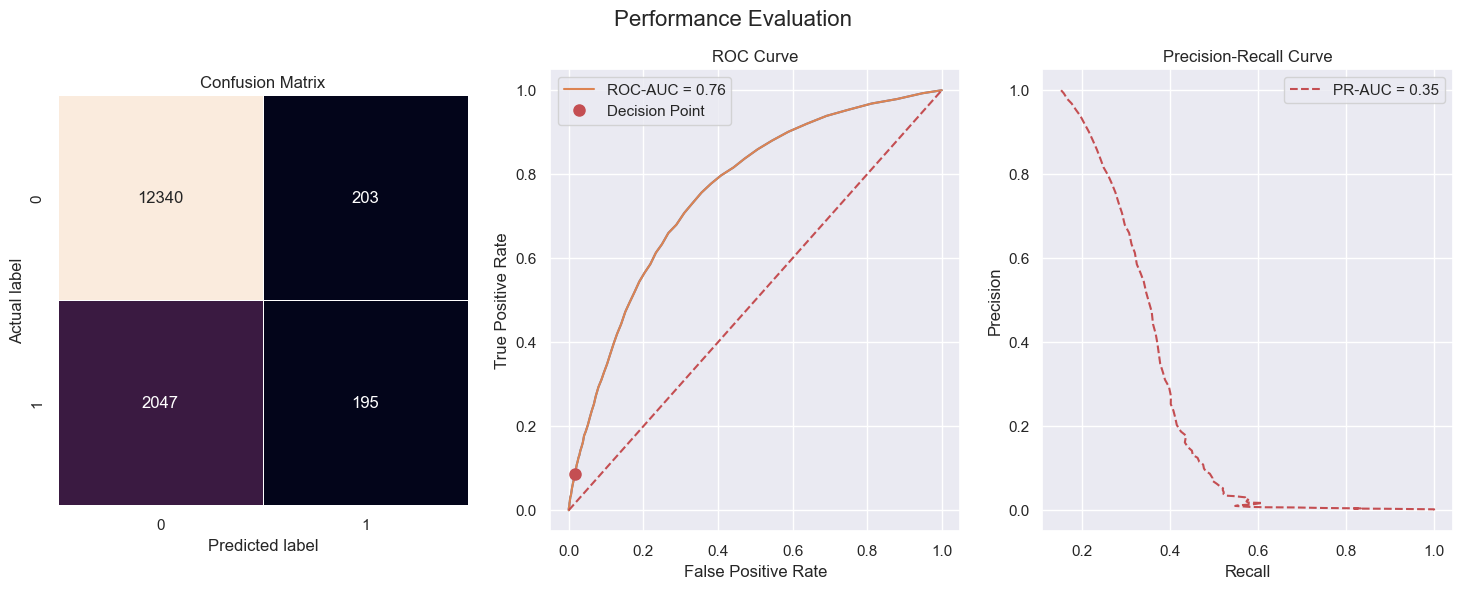

In [151]:
model_evaluation_report(rfc,X_test_ohe,y_test)

In [153]:
pd.DataFrame(rfc.feature_importances_)

,0
0,0.160560
1,0.042526
2,0.136219
3,0.093794
4,0.109144
...,...
72,0.007794
73,0.006871
74,0.004738
75,0.008071


## Implementing scikit-learn's pipelines

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline as ImbPipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [16]:
df = pd.read_csv('customer_booking.csv',encoding="ISO-8859-1")

#Drop duplicate rows
df = df.drop_duplicates()

# Replacing 'booking_origin' having frequency less than 1000
counts = df['booking_origin'].value_counts()
thresold = 1000
repl_col = counts[counts<=thresold].index
df['booking_origin'] = df['booking_origin'].replace(repl_col,'uncommon')

# Replacing 'route' having frequency less then 250
counts = df['route'].value_counts()
thresold = 250
repl_route = counts[counts<=thresold].index
df['route'] = df['route'].replace(repl_route,'other')

print(f'Out dataset contain',df.shape[0],'Rows')

Out dataset contain 49281 Rows


In [17]:
X = df.copy()
y = X.pop('booking_complete')


# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3,random_state = 0)

#list of Categorical columns
cat_features = X_train.select_dtypes(include = 'object').columns.to_list()
# list of categories in categorical columns
cat_list = [list(X_train[column].dropna().unique()) for column in cat_features]
# pipeline to precess categories
cat_pipeline = Pipeline(steps = [(
    'onehot',OneHotEncoder(categories = cat_list,sparse_output = False,
                           handle_unknown = 'error',drop = 'first')
)])

preprocessor = ColumnTransformer(transformers = [
    ('categorical',cat_pipeline,cat_features)
],remainder = 'drop')


In [20]:
ros = RandomOverSampler(random_state = 42)
X_resampled,y_resampled = ros.fit_resample(X_train,y_train)

#### Decision Tree Pipeline

In [47]:
tree_pipeline = ImbPipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',DecisionTreeClassifier(random_state = 42))
])

In [49]:
tree_pipeline.fit(X_resampled,y_resampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'OneWay',
                                                                                              'CircleTrip'],
                                                                                             ['Mon',
                                                                                              'Sat',
                                                                                              'Sun',
                                                                                              'Fri',
                                                                                              'Thu',
                                                                                              'Wed',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'AKLKUL',
                                                                                              'DPSICN',
                                                                                              'MELSGN',
                                                                                              'DPSKIX',
                                                                                              'CGKHND',
                                                                                              'DMKKIX',
                                                                                              'KIXSIN',
                                                                                              'KTMPEN',
                                                                                              'ICNSIN',
                                                                                              'HNDPEN',
                                                                                              'PENPER',
                                                                                              'CMBSYD',...
                                                                                              'COKMEL',
                                                                                              'DMKICN',
                                                                                              'HKTOOL',
                                                                                              'ICNMEL',
                                                                                              'PENTPE', ...],
                                                                                             ['Australia',
                                                                                              'Taiwan',
                                                                                              'Malaysia',
                                                                                              'Japan',
                                                                                              'South '
                                                                                              'Korea',
                                                                                

_________scores____________ 

Accuracy  :  0.66
Precision :  0.83
Recall    :  0.66


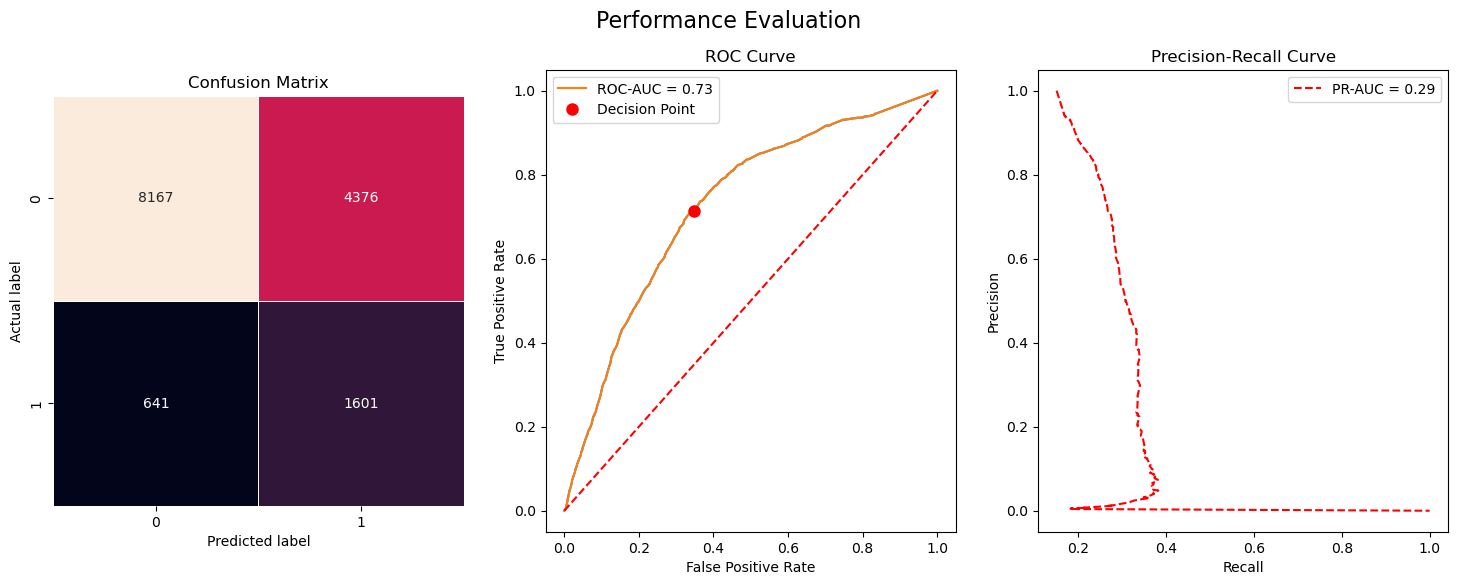

In [50]:
model_evaluation_report(tree_pipeline,X_test,y_test)

In [204]:
tree_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'OneWay',
                                                                                              'CircleTrip'],
                                                                                             ['Mon',
                                                                                              'Sat',
                                                                                              'Sun',
                                                                                              'Fri',
                                                                                              'Thu',
                                                                                              'Wed',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'AKLKUL',
                                                                                              'DPSICN',
                                                                                              'MELSGN',
                                                                                              'DPSKIX',
                                                                                              'CGKHND',
                                                                                              'DMKKIX',
                                                                                              'KIXSIN',
                                                                                              'KTMPEN',
                                                                                              'ICNSIN',
                                                                                              'HNDPEN',
                                                                                              'PENPER',
                                                                                              'CMBSYD',...
                                                                                              'COKMEL',
                                                                                              'DMKICN',
                                                                                              'HKTOOL',
                                                                                              'ICNMEL',
                                                                                              'PENTPE', ...],
                                                                                             ['Australia',
                                                                                              'Taiwan',
                                                                                              'Malaysia',
                                                                                              'Japan',
                                                                                              'South '
                                                                                              'Korea',
                                                                                

#### Logistic Regression Pipeline

In [218]:
from sklearn.linear_model import LogisticRegression
log_pipeline = Pipeline(steps = [
    ('preprocess',preprocessor),('classifier',LogisticRegression())
])

In [226]:
log_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'OneWay',
                                                                                              'CircleTrip'],
                                                                                             ['Mon',
                                                                                              'Sat',
                                                                                              'Sun',
                                                                                              'Fri',
                                                                                              'Thu',
                                                                                              'Wed',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'AKLKUL',
                                                                                              'DPSICN',
                                                                                              'MELSGN',
                                                                                              'DPSKIX',
                                                                                              'CGKHND',
                                                                                              'DMKKIX',
                                                                                              'KIXSIN',
                                                                                              'KTMPEN',
                                                                                              'ICNSIN',
                                                                                              'HNDPEN',
                                                                                              'PENPER',
                                                                                              'CMBSYD',
                                                                                              'D...
                                                                                              'PERTPE',
                                                                                              'PERSGN',
                                                                                              'HNDSIN',
                                                                                              'COKMEL',
                                                                                              'DMKICN',
                                                                                              'HKTOOL',
                                                                                              'ICNMEL',
                                                                                              'PENTPE', ...],
                                                                                             ['Australia',
                                                                                              'Taiwan',
                                                                                        

_________scores____________ 

Accuracy  :  0.85
Precision :  0.8
Recall    :  0.85


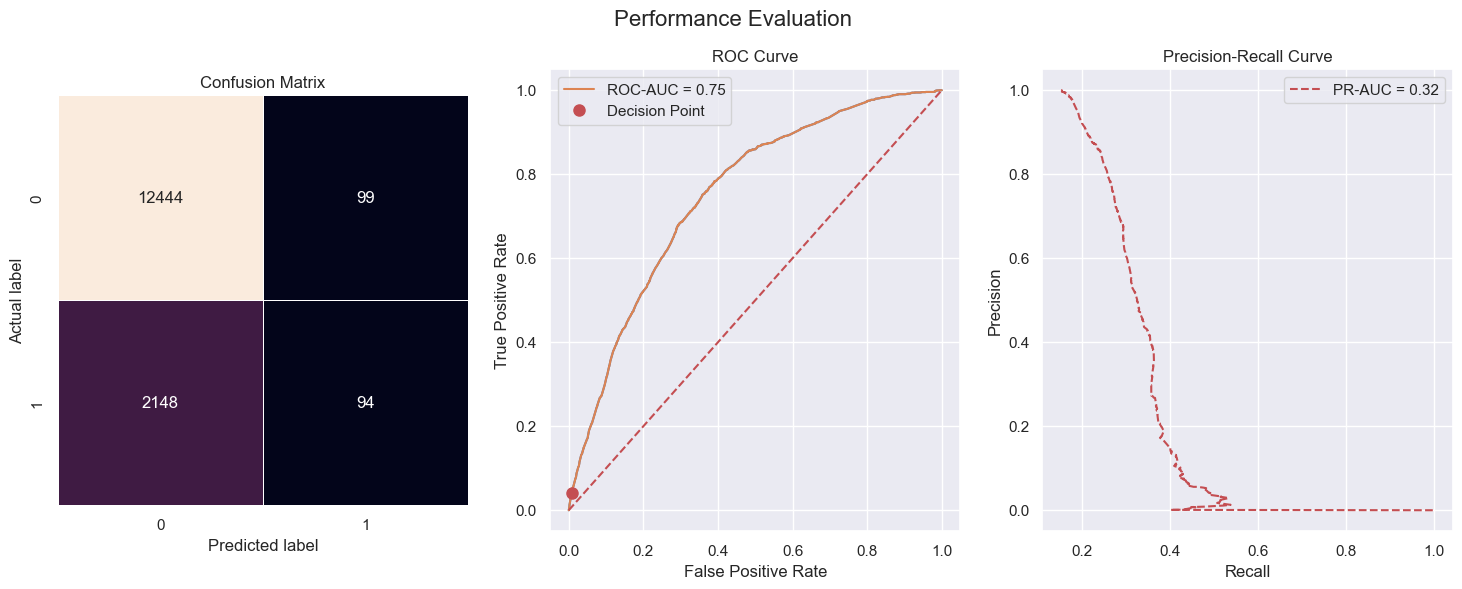

In [228]:
model_evaluation_report(log_pipeline,X_test,y_test)

#### Random Forest Classifier Pipeline

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
rfc = RandomForestClassifier(random_state = 42)
rfc_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),('classifier',rfc)
])

In [110]:
rfc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'CircleTrip',
                                                                                              'OneWay'],
                                                                                             ['Thu',
                                                                                              'Fri',
                                                                                              'Mon',
                                                                                              'Wed',
                                                                                              'Sun',
                                                                                              'Sat',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'DMKOOL',
                                                                                              'HKTPER',
                                                                                              'COKSYD',
                                                                                              'DMKSYD',
                                                                                              'CMBSYD',
                                                                                              'DPSICN',
                                                                                              'PENTPE',
                                                                                              'PENPER',
                                                                                              'CGKHND',
                                                                                              'SGNSYD',
                                                                                              'DPSKIX',
                                                                                              'DPSPEK',...
                                                                                              'CGKKIX',
                                                                                              'CMBMEL',
                                                                                              'KCHPER',
                                                                                              'KTMPEN',
                                                                                              'MELTPE', ...],
                                                                                             ['Australia',
                                                                                              'Japan',
                                                                                              'Thailand',
                                                                                              'uncommon',
                                                                                              'Malaysia',
                                                                                              'South '
                                                                           

_________scores____________ 

Accuracy  :  0.84
Precision :  0.77
Recall    :  0.84


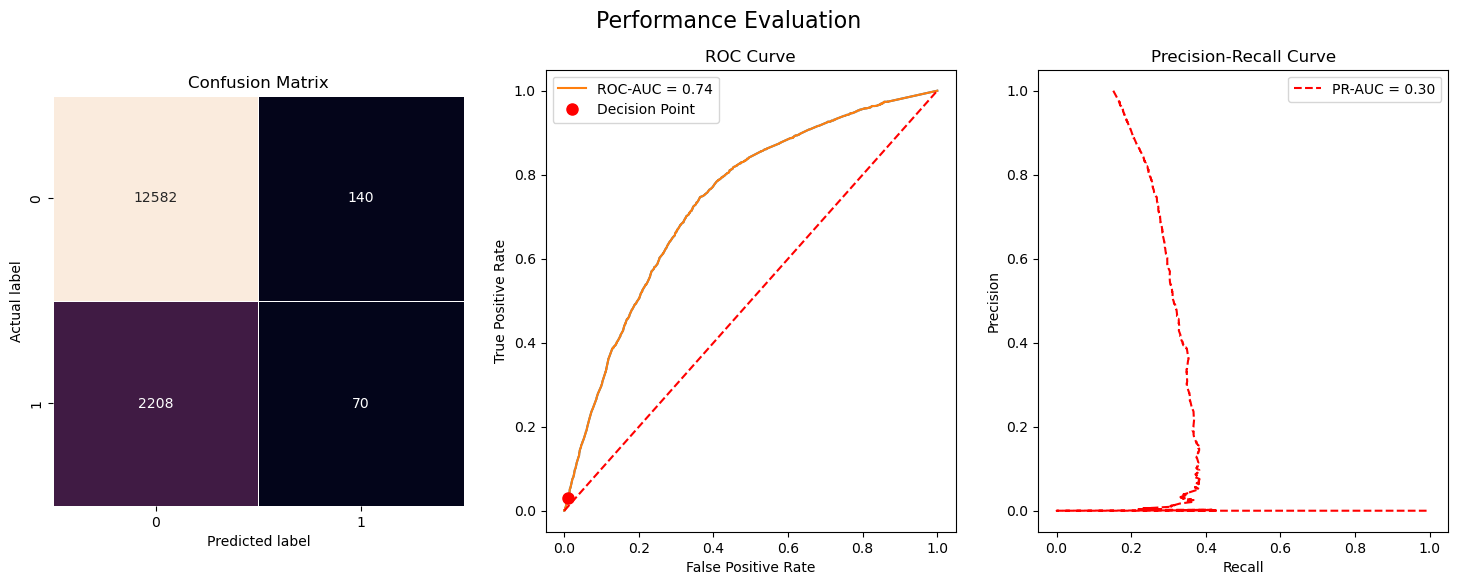

In [112]:
model_evaluation_report(rfc_pipeline,X_test,y_test)

In [262]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn import metrics
import numpy as np

N_SEARCHES = 100
k_fold = StratifiedKFold(5, shuffle=True, random_state=42)

In [264]:
rf_param_grid = {'classifier__n_estimators': np.linspace(100, 1000, 10, dtype=int),
                'classifier__max_features': ['log2', 'sqrt', None],
                'classifier__max_depth': np.arange(3, 11, 1, dtype=int),
                'classifier__min_samples_split': [2, 5, 10],
                'classifier__min_samples_leaf': np.arange(1, 51, 2, dtype=int),
                'classifier__bootstrap': [True, False]}

In [ ]:
rf_rs =  RandomizedSearchCV(rfc_pipeline, rf_param_grid, scoring='recall', 
                           cv=k_fold, n_jobs=-1, verbose=1, 
                            n_iter=N_SEARCHES, random_state=42)

rf_rs.fit(X_train, y_train)

print(f'Best parameters: {rf_rs.best_params_}') 
print(f'Recall (Training set): {rf_rs.best_score_:.4f}') 
print(f'Recall (Test set): {metrics.recall_score(y_test, rf_rs.predict(X_test)):.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


#### Gradient Boosting Trees Pipeline

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
gbt = GradientBoostingClassifier(random_state = 42)
gbt_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',gbt)
])

_________scores____________ 

Accuracy  :  0.85
Precision :  0.76
Recall    :  0.85


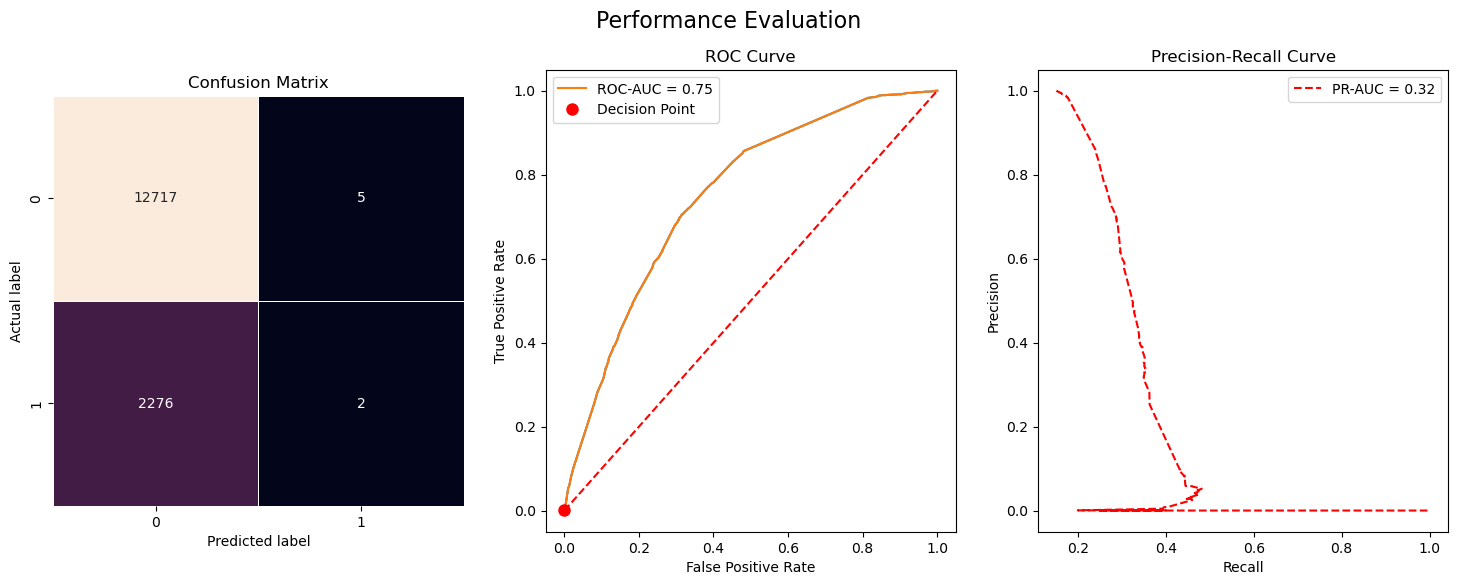

In [129]:
gbt_pipeline.fit(X_train,y_train)
model_evaluation_report(gbt_pipeline,X_test,y_test)

In [13]:
## xgboost

In [258]:
#pip install xgboost

In [260]:
#pip install lightgbm

In [234]:
# xgBoost Pipeline

#### XGBClassifier Pipeline

In [238]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(random_state = 42)

In [240]:
xgb_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',xgb)
])

In [242]:
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'OneWay',
                                                                                              'CircleTrip'],
                                                                                             ['Mon',
                                                                                              'Sat',
                                                                                              'Sun',
                                                                                              'Fri',
                                                                                              'Thu',
                                                                                              'Wed',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'AKLKUL',
                                                                                              'DPSICN',
                                                                                              'MELSGN',
                                                                                              'DPSKIX',
                                                                                              'CGKHND',
                                                                                              'DMKKIX',
                                                                                              'KIXSIN',
                                                                                              'KTMPEN',
                                                                                              'ICNSIN',
                                                                                              'HNDPEN',
                                                                                              'PENPER',
                                                                                              'CMBSYD',...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

_________scores____________ 

Accuracy  :  0.85
Precision :  0.78
Recall    :  0.85


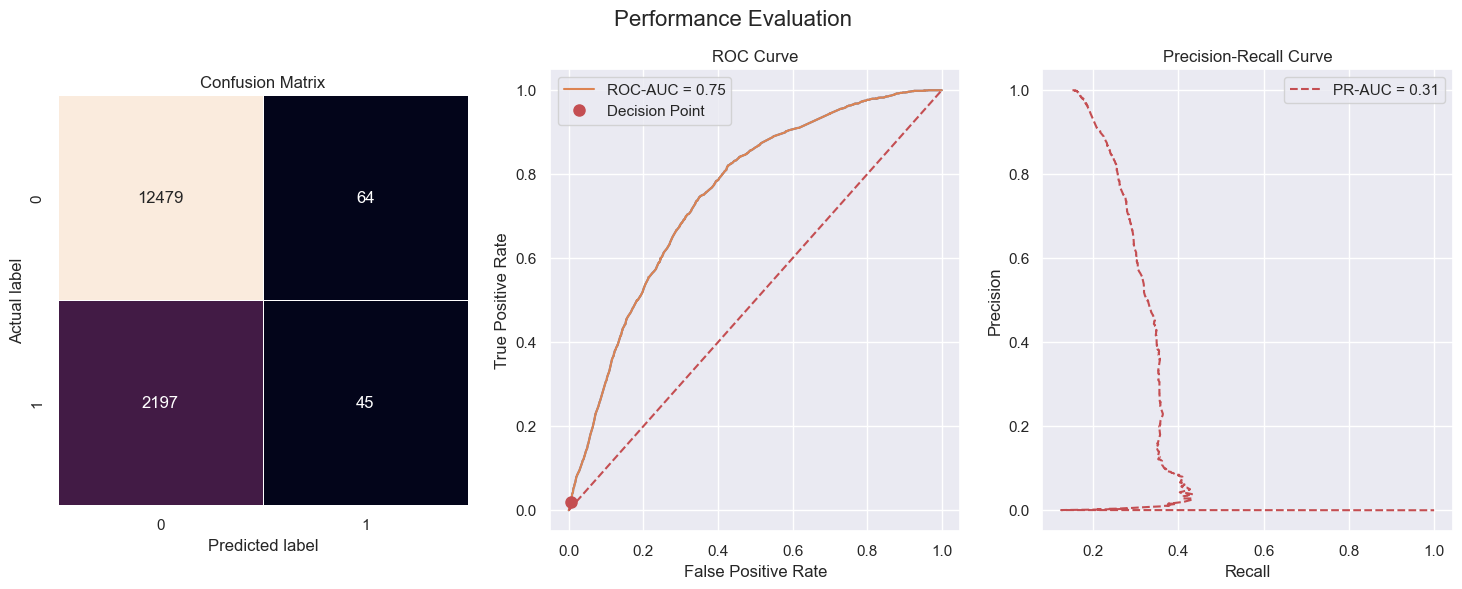

In [244]:
model_evaluation_report(xgb_pipeline,X_test,y_test)

#### LGBM Classifier Pipeline

In [246]:
from lightgbm import LGBMClassifier

In [250]:
lgbm = LGBMClassifier(random_state = 42)
lgbm_pipeline = Pipeline(steps = [
    ('preprocessor',preprocessor),
    ('classifier',lgbm)
])

In [252]:
lgbm_pipeline.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 5149, number of negative: 29347
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 34496, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149264 -> initscore=-1.740388
[LightGBM] [Info] Start training from score -1.740388


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(categories=[['Internet',
                                                                                              'Mobile'],
                                                                                             ['RoundTrip',
                                                                                              'OneWay',
                                                                                              'CircleTrip'],
                                                                                             ['Mon',
                                                                                              'Sat',
                                                                                              'Sun',
                                                                                              'Fri',
                                                                                              'Thu',
                                                                                              'Wed',
                                                                                              'Tue'],
                                                                                             ['other',
                                                                                              'AKLKUL',
                                                                                              'DPSICN',
                                                                                              'MELSGN',
                                                                                              'DPSKIX',
                                                                                              'CGKHND',
                                                                                              'DMKKIX',
                                                                                              'KIXSIN',
                                                                                              'KTMPEN',
                                                                                              'ICNSIN',
                                                                                              'HNDPEN',
                                                                                              'PENPER',
                                                                                              'CMBSYD',...
                                                                                              'HNDSIN',
                                                                                              'COKMEL',
                                                                                              'DMKICN',
                                                                                              'HKTOOL',
                                                                                              'ICNMEL',
                                                                                              'PENTPE', ...],
                                                                                             ['Australia',
                                                                                              'Taiwan',
                                                                                              'Malaysia',
                                                                                              'Japan',
                                                                                              'South '
                                                                               

_________scores____________ 

Accuracy  :  0.85
Precision :  0.79
Recall    :  0.85


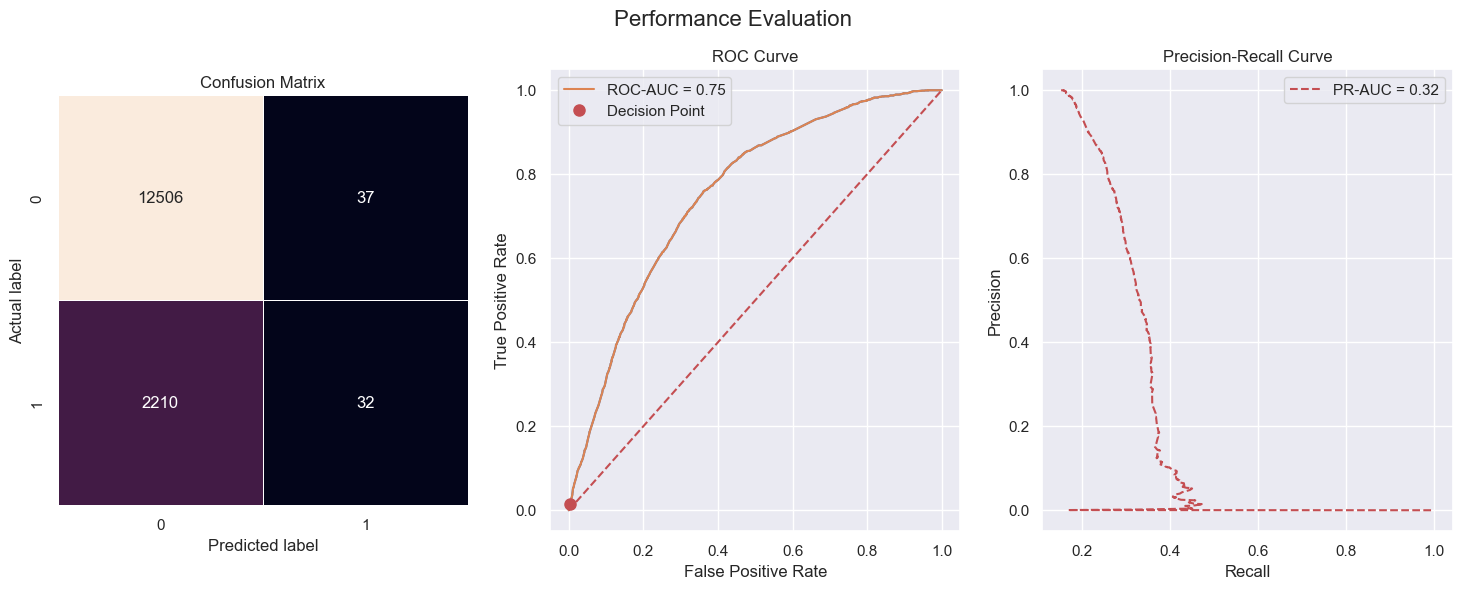

In [256]:
model_evaluation_report(lgbm_pipeline,X_test,y_test)